In [1]:
from lunar_crush_rest import CrushClient

In [2]:
key = 'your key here'
lc = CrushClient(api_key=key)

In [3]:
# Open the documentation to see what types of inputs you can use
lc.help()

['id', 'name', 'symbol', 'price', 'price_btc', 'market_cap', 'percent_change_24h', 'percent_change_7d', 'percent_change_30d', 'volume_24h', 'max_supply', 'timeSeries', 'social_dominance_calc_24h_previous', 'social_contributors_calc_24h_previous', 'url_shares_calc_24h_previous', 'tweet_spam_calc_24h_previous', 'news_calc_24h_previous', 'average_sentiment_calc_24h_previous', 'social_score_calc_24h_previous', 'social_volume_calc_24h_previous', 'alt_rank_30d_calc_24h_previous', 'alt_rank_calc_24h_previous', 'social_dominance_calc_24h', 'social_dominance_calc_24h_percent', 'social_contributors_calc_24h', 'social_contributors_calc_24h_percent', 'url_shares_calc_24h', 'url_shares_calc_24h_percent', 'tweet_spam_calc_24h', 'tweet_spam_calc_24h_percent', 'news_calc_24h', 'news_calc_24h_percent', 'average_sentiment_calc_24h', 'average_sentiment_calc_24h_percent', 'social_score_calc_24h', 'social_score_calc_24h_percent', 'social_volume_calc_24h', 'social_volume_calc_24h_percent', 'asset_id', 'time

<AxesSubplot:xlabel='datetime'>

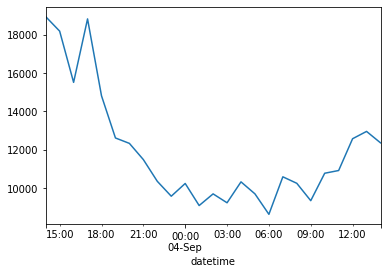

In [4]:
# ASSET DATA
asset_data = lc.get_info('assets', symbol='BTC')
print(asset_data['data']['BTC'].attr_names)
print(asset_data['data']['BTC'].market_cap)
asset_data['data']['BTC'].timeSeries['tweets'].plot()

In [5]:
# MARKET PAIRS
pairs_data = lc.get_info('market-pairs', symbol='BTC,LTC')
print(pairs_data['data']['LTC'].attr_names)
print(pairs_data['data']['BTC'].marketPairs)

['name', 'symbol', 'total_rows', 'marketPairs']
                              id  asset_id  exchange_id  \
unique_key                                                
1:coinex:GAS:BTC           20846         1          138   
1:coinex:UMA:BTC           19640         1          138   
1:citex:BTC:USDT           47160         1          113   
1:citex:ETH:BTC            47195         1          113   
1:pcex-member:BTC:INR  864353736         1      1033912   
...                          ...       ...          ...   
1:indoex:ETC:BTC           32503         1          245   
1:coinone:BTC:KRW          20109         1          160   
1:gdax:BTC:EUR             48015         1          121   
1:binance:XRP:BTC          19663         1           32   
1:coin-egg:BTC:USDT    913677867         1          137   

                                                                      1d  \
unique_key                                                                 
1:coinex:GAS:BTC       {"volume"

In [6]:
# MARKET
market_data = lc.get_info('market', limit='10')
topcoin = list(market_data['data'].keys())[0]
print(market_data['data'].keys())
print(market_data['data'][topcoin].attr_names)
print('Galaxy Score: ', market_data['data'][topcoin].gs)
print('Config Message: ', market_data['usage'])

dict_keys(['1:AXS', '2:FTM', '3:HIVE', '4:MATIC', '5:POLY', '6:IOST', '7:RARI', '8:LTC', '9:CHZ', '10:SLIM'])
['id', 's', 'n', 'p', 'p_btc', 'v', 'vt', 'pc', 'pch', 'mc', 'gs', 'ss', 'as', 'bl', 'br', 'sp', 'na', 'md', 't', 'r', 'yt', 'sv', 'u', 'c', 'sd', 'd', 'cr', 'acr', 'tc', 'timeSeries', 'e2', 'nft']
Galaxy Score:  73
Config Message:  {'day': 95, 'month': 370}


<AxesSubplot:xlabel='datetime'>

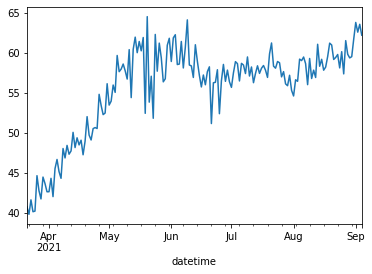

In [7]:
# GLOBAL
global_data = lc.get_info('global', interval='day')
global_data['data'].timeSeries['altcoin_dominance'].plot()

In [8]:
# META
meta_data = lc.get_info('meta')
print(meta_data['data']['BTC'].symbol)
print(meta_data['data']['BTC'].name)
print(meta_data['data']['BTC'].id)

BTC
Bitcoin
1


In [9]:
# EXCHANGES
exchanges_data = lc.get_info('exchanges', order_by='1d_trades')
print(exchanges_data['data'].exchanges)

                         id                name  num_pairs     1d_volume  \
lunar_id                                                                   
binance                  32             Binance       1758  5.952849e+10   
coinbase-pro            121        Coinbase Pro        205  9.780241e+09   
ftx                     167                 FTX       1564  1.427717e+10   
coinbase-exchange   1314948   Coinbase Exchange        295  4.880383e+09   
gate-io                 171             Gate.io       1862  5.229140e+08   
...                     ...                 ...        ...           ...   
synthetix-exchange      297  Synthetix Exchange        459  3.329155e+06   
lgo                     300                 LGO          4  0.000000e+00   
tideal                  301              Tideal         15  0.000000e+00   
tidebit                 303             Tidebit          0  0.000000e+00   
litebit                 304             LiteBit         84  3.881667e+06   

           

In [10]:
# EXCHANGE (individual - includes other interesting stuff like a description)
exchange_data = lc.get_info('exchange', exchange='FTX')
print(exchange_data['data'].exchange['logo'])

https://dkhpfm5hits1w.cloudfront.net/exchanges/ftx.png


In [11]:
# COIN OF THE DAY
coin_of_day = lc.get_info('coinoftheday')
print(coin_of_day['data'].symbol)
print(coin_of_day['data'].name)

BAT
Basic Attention Token


In [12]:
# COIN OF THE DAY INFO
coin_of_day_info = lc.get_info('coinoftheday_info')
print(coin_of_day_info['data'].last_changed)
print(coin_of_day_info['data'].history)

2021-09-04 13:00:00
                       id symbol                   name
last_cotd                                              
2019-04-10 16:52:50   339   AUTO                   Cube
2019-04-13 16:58:18   289    TNB          Time New Bank
2019-05-11 17:21:38   312   TPAY               TokenPay
2019-05-17 17:35:51   199   MITH                Mithril
2019-05-18 17:37:35   197    GNO                 Gnosis
...                   ...    ...                    ...
2021-08-31 12:00:00  2108   ALGO               Algorand
2021-09-01 12:00:00     3    XRP                    XRP
2021-09-02 12:00:00     1    BTC                Bitcoin
2021-09-03 12:00:00     4    LTC               Litecoin
2021-09-04 12:00:00    31    BAT  Basic Attention Token

[150 rows x 3 columns]


In [13]:
# FEEDS - needs testing when twitter is more active
feeds = lc.get_info('feeds', symbol=['SHIB'], limit=10)
print(feeds['data']['SHIB'].profile_image)

https://pbs.twimg.com/profile_images/1363135271391301635/yRKRzd2v_normal.jpg


In [14]:
# INFLUENCERS
influencers = lc.get_info('influencers')
print(influencers['data'].keys())

Index(['medium', 'identifier', 'volume', 'followers', 'engagement', 'verified',
       'display_name', 'following', 'profile_image', 'banner_image',
       'volume_rank', 'followers_rank', 'engagement_rank',
       'influencer_rank_average', 'influencer_rank'],
      dtype='object')


['profile', 'stats', 'tweets']
2105969


<AxesSubplot:title={'center':'Tyler Winkelvoss tweet engagement'}, xlabel='datetime'>

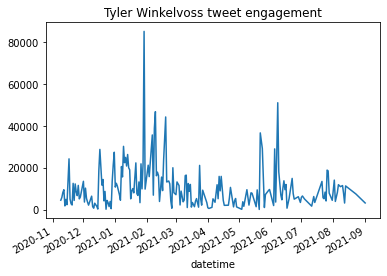

In [15]:
# INFLUENCER --- for if you want info about just one influencer
tyler_info = lc.get_info('influencer', screen_name='tyler', days=300)
print(tyler_info['data'].attr_names)
print(tyler_info['data'].stats['engagement'])
tyler_info['data'].stats['daily_metrics'].set_index('datetime', inplace=True)
tyler_info['data'].stats['daily_metrics']['engagement'].plot(title='Tyler Winkelvoss tweet engagement')